## KNeighbors Regressor 

In [5]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


from matplotlib import pyplot as plt
import numpy as np

In [6]:
# Import Data
#data = pd.read_csv('data/data_encod.csv', index_col=[0])
#data = pd.read_csv('data/train_771.csv', index_col=[0])
data = pd.read_csv('data/train_8_mean.csv', index_col=[0])
train=data[data.target.notnull()].reset_index(drop=True)
test=data[data.target.isna()].reset_index(drop=True)

print(f'Data: {data.shape}')
print(f'Train: {train.shape}') #(15539, 44)
print(f'Test: {test.shape}')

Data: (15539, 8)
Train: (15539, 8)
Test: (0, 8)


In [7]:
# select only Location D
train = train[(train['location']== 3)]
train.shape

(4990, 8)

In [8]:
#fillna
train = train.fillna(train.mean())

In [9]:
train.head()

,location,target,mean_temp,mean_precip,mean_rel_humidity,mean_wind_dir,mean_wind_spd,mean_atmos_press
1,3,79.131702,24.679063,0.007025,0.758058,177.109855,0.899208,90.429924
10,3,55.638261,23.189507,0.094843,0.789361,157.660400,1.101989,90.624814
13,3,32.240851,23.151446,0.019826,0.846708,186.973246,0.770193,90.454477
15,3,72.717021,22.341529,0.169471,0.831924,184.881884,0.737514,90.607307
22,3,35.833571,22.401240,0.529488,0.844606,201.836702,0.795768,90.600544


In [10]:
columns_to_drop = ['target']
# define features and target
X = train.drop(columns_to_drop, axis=1)
y = train.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 7)
y: (4990,)
X_train: (3493, 7)
y_train: (3493,)
X_test: (1497, 7)
y_test: (1497,)


In [11]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

In [12]:
# Instantiate our model 
knr = KNeighborsRegressor()

# Train the model using our data
knr.fit(X_train, y_train)


# predict
y_pred_train = knr.predict(X_train)
y_pred_test = knr.predict(X_test)

RSME _ train: 22.84
RSME _ test: 30.09


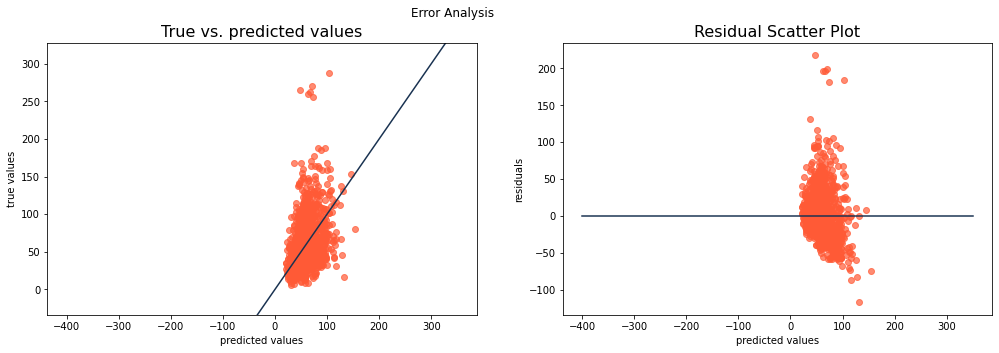

In [15]:
rsme_knr_train = rmse(y_train, y_pred_train )
rsme_knr_test = rmse(y_test, y_pred_test )

print(f'RSME _ train: {rsme_knr_train:.2f}')
print(f'RSME _ test: {rsme_knr_test:.2f}')

# error analysis train:
error_analysis(y_test, y_pred_test)

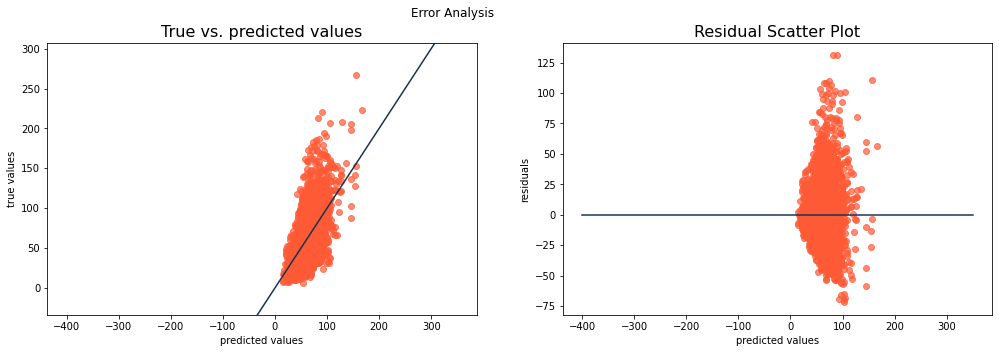

In [16]:
# error analysis train:
error_analysis(y_train, y_pred_train)